           BOSTON HOUSING REGRESSION PIPELINE (y=b+m*x)

In [1]:
import pandas as pd
##Loading the dataset
data = pd.read_csv('/home/lewis/Desktop/ENV/ven/DATA_SCIENCE/BOSTON HOUSING/bostonhousing.csv')

boston = data.dropna()
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [2]:
boston[['CHAS', 'RM', 'AGE', 'RAD', 'MEDV']].head()

,CHAS,RM,AGE,RAD,MEDV
0,0.0,6.575,65.2,1,24.0
1,0.0,6.421,78.9,2,21.6
2,0.0,7.185,61.1,2,34.7
3,0.0,6.998,45.8,3,33.4
5,0.0,6.430,58.7,3,28.7


In [3]:
boston.shape

(394, 14)

In [4]:
## the dataset has 506 rows and 14 columns

In [5]:
boston.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00
mean,3.69,11.46,11.00,0.07,0.55,6.28,68.93,3.81,9.40,406.43,18.54,358.49,12.77,22.36
std,9.20,23.95,6.91,0.25,0.11,0.70,27.89,2.10,8.63,168.31,2.17,89.28,7.31,9.14
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,2.60,1.73,5.00
25%,0.08,0.00,5.13,0.00,0.45,5.88,45.47,2.11,4.00,280.25,17.40,376.71,7.12,16.80
50%,0.27,0.00,8.56,0.00,0.54,6.20,77.70,3.20,5.00,330.00,19.10,392.19,11.30,21.05
75%,3.44,12.50,18.10,0.00,0.62,6.61,94.25,5.12,24.00,666.00,20.20,396.90,17.12,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


Visualisation of feature data

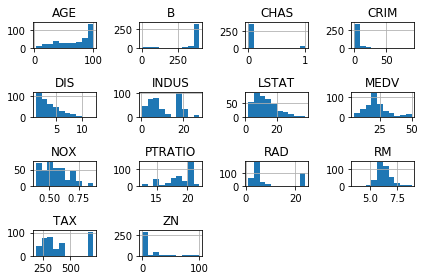

In [6]:
import matplotlib.pyplot as plt
boston.hist()
plt.tight_layout()
plt.show()

In [7]:
## MEDV and RM features have a normal distribution

 Data Correlation

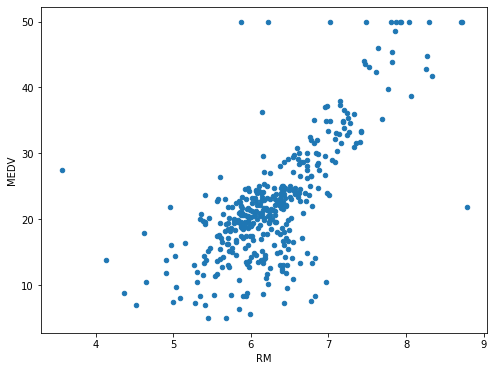

In [9]:
corr_matrix = boston.corr().round(2)
boston.plot(kind='scatter', x='RM', y='MEDV', figsize=(8,6))

In [10]:
## RM and MEDV are highly correlated

In [11]:
## Data Preparation
x = boston[['RM']]
y = boston['MEDV']

Linear Regression Fitting (MEDV=b+m*RM)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

##Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(275, 1)
(119, 1)
(275,)
(119,)


In [13]:
## Fitting the Model
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
## Parameter Estimates
print(model.intercept_.round(2))
print(model.coef_.round(2))

-38.25
[9.66]


In [15]:
## b = -30.57
## m = 8.46
## Therefore MEDV=-30.57+8.46*RM

In [17]:
## Predictions
y_test_predicted = model.predict(x_test)
print(y_test_predicted)

[21.31176858 25.19666548 19.50461504 14.59534234 41.93457951 41.56735045
 21.77563686 24.31724852 25.77650084 17.74578112 22.60673421 18.4609114
 25.81515653 38.32027244 24.41388775 23.89203593 17.83275642 23.53447079
 16.17056173 24.95506742 21.12815405 18.32561648  9.13522604 22.95463543
 21.39874388 15.20416946 16.89535593 12.74953311 29.16853769 19.46595935
 23.03194681 17.87141211 26.76222095 16.54745471 30.83073239 19.26301698
 39.39296786 17.29157676 31.68115758 21.1088262  29.79669266 20.36470416
 15.84198836 20.98319521 23.90169985 37.64379786 19.3596562  25.87314007
 23.92102769 21.94958747 21.08949836 27.06180255 25.04204272 20.8962199
 15.53274283 28.23113719 10.42052775 19.39831189 19.76554095 19.02141891
  1.74232521 22.73236521 30.70510139 20.13277001 27.58365438 26.28868874
  9.16421781 18.13233803 27.40970377 15.89030797 22.30715261 36.07824239
 23.70842139 23.42816764 20.19075355 21.89160394 19.63990996 18.15166587
 19.3596562  24.17228968 25.59288631 15.60039029 19.6

Model Evaluation

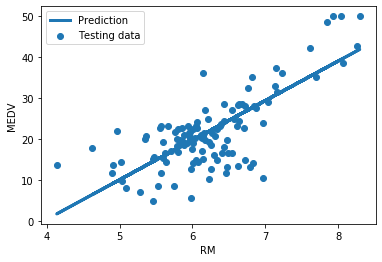

In [18]:
#True observations in the Test set
plt.scatter(x_test, y_test, label='Testing data');
plt.plot(x_test, y_test_predicted, label='Prediction', linewidth=3)
plt.xlabel('RM');plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()

In [19]:
#Residual is the difference target value and predicted value
residuals = y_test-y_test_predicted
residuals

96      0.088231
289    -0.396665
456    -6.804615
143     1.004658
267     8.065420
         ...    
16      3.991606
391     2.970591
209     6.602984
107    -0.563867
431   -13.686597
Name: MEDV, Length: 119, dtype: float64

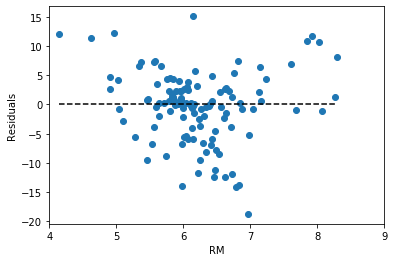

In [20]:
plt.scatter(x_test, residuals)#Plot the residuals
plt.hlines(y=0, xmin=x_test.min(), xmax=x_test.max(), linestyle='--')#Plot a horizontal line at y=0
plt.xlim((4,9)) #Set xlim
plt.xlabel('RM');
plt.ylabel('Residuals')
plt.show()

Mean Squred Error(MSE)

In [21]:
residuals[:5] #first five residuals in our model

96     0.088231
289   -0.396665
456   -6.804615
143    1.004658
267    8.065420
Name: MEDV, dtype: float64

In [22]:
residuals.mean()#Mean for all data points

-0.2746412560012191

In [23]:
#Mean Squared Error
(residuals**2).mean()

37.43178264485403

In [24]:
#OR
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_predicted)

37.43178264485403

R-Squared

In [25]:
model.score(x_test, y_test)

0.5328697905293591

In [26]:
#OR 1-R-Squared=1-Variation/TotalVariation
#Total Variation (sum of squares of the difference between the target value and the mean of the target value)
total_variation = ((y_test-y_test.mean())**2).sum()
#Variation
variation = (residuals**2).sum()
#R-Squared
rsquared = 1-variation/total_variation
rsquared

0.5328697905293591

Multivariative Linear Regression (MEDV=b0+b1RM+b2LSTAT)

In [27]:
#Data Preparation
#Includes the 'LSTAT' feature
x2 = boston[['RM', 'LSTAT']]
y = boston['MEDV']

In [28]:
#Train Test split to ensure the same splits
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, random_state=1)
model2 = LinearRegression()

In [29]:
#Fit model2
model2.fit(x2_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#Parameters
print(model2.intercept_)
print(model2.coef_)

-4.051904003933878
[ 5.5397727  -0.66988195]


In [32]:
#Predictions
y_test_predicted2 = model2.predict(x2_test)
print(y_test_predicted2)

[22.4932538  25.9461264  16.31932172  8.54129191 36.92766836 39.32969662
 26.19565731 23.59313289 28.19437515 18.60020348 19.26318336 21.77675913
 17.08309617 37.72288813 19.3545873  28.07874949 18.28832518 27.88717553
  7.09298921 26.38373056 23.65407501 20.58049945  3.48875913 26.11454297
 17.3113337   8.24721092 19.23140635  4.54241355 30.81541614 22.35289549
 19.15859474 17.37934836 29.67047142 15.56868483 33.16161151 16.91099873
 38.52536985 14.4411212  31.39160932 17.43318976 31.77839512 25.84906904
 12.5852359  19.77274774 21.26489097 36.89968077 16.95969764 28.69189497
 25.20817758 20.03867577 23.08261272 31.02119661 27.27763978 23.76897679
 15.28175676 27.40426461  6.64382275 19.72837274 14.92146827 16.63182921
 -6.56374234 26.38235855 32.49339952 24.25577184 30.43610016 28.74253824
 -0.16557466 22.59322979 19.35701903 16.12981502 25.36824431 34.14666459
 21.40195184 24.36294834 17.87154136 15.83207257 19.30416622 15.77821223
 22.35224737 15.66571863 27.60680446 16.97514359 11

Comparing Models (Better models have a lower MSE)

In [33]:
#MSE of the first model
print('First Model(MEDV and RM)')
print(mean_squared_error(y_test, y_test_predicted).round(2))
print('')
#MSE of the second model
print('Second Model (MEDV, RM and LSTAT)')
print(mean_squared_error(y_test, y_test_predicted2).round(2))
print('')
print('The second model is the best model for this problem')

First Model(MEDV and RM)
37.43

Second Model (MEDV, RM and LSTAT)
32.89

The second model is the best model for this problem
